## Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм дял удобства анализа.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as N

Открываем оба файла и изучаем содержащиеся в них данные, чтобы определить наилучший метод объединения, а также столбец по которому, это можно сделать

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/DS/Данные для Сборника-4/mkrf_movies.csv')
display(movies.head())
print(movies.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
shows = pd.read_csv('/content/drive/MyDrive/DS/Данные для Сборника-4/mkrf_shows.csv')
display(shows.head())
print(shows.info())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


Наилучший вариант, будет соединить две таблицы по столбцу, puNumber, единственная проблема состоит в том, что датасет '/datasets/mkrf_movies.csv' содержит этот файл в формате- object, тогда как для слияния нам нужны одинковый тип значений. Решением будет привести оба столбца к единому типу данных, используя метода to_numeric и затем объединить их методом merge, так как нам необхоимо объединение таблиц по значениям столбцов.

In [ ]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')
shows['puNumber'] = pd.to_numeric(shows['puNumber'], errors='coerce')
# И проверяем результат
movies.info()
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Так как по заданию, нам важно чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм, мы указываем в методе соответствующий аргумент

In [ ]:
df = movies.merge(shows, on='puNumber', how='left')
# проеряем результат слияния по несолкьим из строк, где точно указан box office
display(df.query('puNumber == 111000115'))
display(df.query('puNumber == 111000117') )
pd.options.display.float_format = '{:,.0f}'.format

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2397,Небесный верблюд,111000115.0,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",61040.0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3670,После тебя,111000117.0,2017-01-10T12:00:00.000Z,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.0,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма,12260956.0


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

Проверяем тип строк в датафреме методом info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- title — название фильма; object- подходит
- puNumber — номер прокатного удостоверения; float64- необходима замена на тип int, так как речь идет о целых числах
- show_start_date — дата премьеры фильма; object - речь идет о даче начала необходима замена на формат подходящий для даты и времени datetime64
- type — тип фильма; object- подходит
- film_studio — студия-производитель; object- подходит
- production_country — страна-производитель; object- подходит
- director — режиссёр; object- подходит
- producer — продюсер; object- подходит
- age_restriction — возрастная категория; object- подходит
- refundable_support — объём возвратных средств государственной поддержки; float64- подходит
- nonrefundable_support — объём невозвратных средств государственной поддержки; float64- подходит
- financing_source — источник государственного финансирования; object- подходит
- budget — общий бюджет фильма; float64- подходит
- ratings — рейтинг фильма на КиноПоиске; object- дробный тип данных, необходима замена на тип float64
- genres — жанр фильма; object- подходит
- box_office — сборы в рублях; float64- подходит

Проводим замену в необходимых строках с использованием соответствующих методов

In [ ]:
df['puNumber'] = df['puNumber'].astype('int',errors='ignore')
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['ratings'] = pd.to_numeric(df['ratings'],errors='coerce')
# проверяем реузальтат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучим пропуски в датафрейме

In [ ]:
#Смотрим столбцы с наибольшим колличеством пропусков
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Насколько видим по результатам выгрузки, основная масса пропусков пропущена в столбцах refundable_support, nonrefundable_support, budget и financing_source, все эти показатели относятся к финансовым данным по каждому из фильмов и показывают проблему в изначальных данных, а именно отсуствие изначальных данных в этот столбцах. Заполнять эти значения не стоит, так как отсутствие значений, важный показатель для дальнейшего анализа. Возможно это одна из особенностей базы данных мин культа.

In [ ]:
# Проверяем гипотезу причины пропусков в поле producer
display(df[df['producer'].isna()].head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,"111,013,716",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN
5,Остановился поезд,"111,013,816",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,NaN
6,Любовь и голуби,"111,007,013",2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия","2,700"
9,Отпуск за свой счет,"111,019,114",2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",NaN
11,Ответный ход,"111,019,014",2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"боевик,драма,приключения",NaN
15,Председатель,"111,014,916",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,драма,NaN
16,Осенний марафон,"111,007,513",2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"драма,мелодрама,комедия",NaN
17,Осень,"111,027,914",2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Смирнов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"драма,мелодрама",NaN
18,Неподдающиеся,"111,003,616",2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",360
19,Неподсуден,"111,003,716",2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,420


Пропуски в поле producer, можно объяснить лишь тем, что если он не указан, следовательно данная картина снималась без привлечения продюссера, как например это было в СССР, что дополлнительно видно по тому факту, что в большинстве случаев продюссер не указан именно в Советских фильмах, в то время как, если продюссером и режиссером является один человек, это отоброжено в данных других фильмов, таким образом пропуск продюссера не случайный, и отображает отсутствие продюссера у картины.

In [ ]:
# Проверяем гипотезу причины и потенциальную связь между пропусками в поле ratings и genres
display(df[df['ratings'].isna()].head(10))
display(df[df['ratings'].isna()].tail(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),"121,000,606",2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,"111,013,615",2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),"221,037,813",2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,"224,011,014",2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,"111,026,714",2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,Прошлое,"221,030,715",2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,"ужасы,триллер,драма",NaN
264,Разбойник и принцесса /По мотивам сказок Карел...,"224,010,714",2014-08-28 12:00:00+00:00,Художественный,Чешское телевидение,Чехия,Карел Смычек,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименно...,"126,001,812",2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Опера на льду,"126,001,712",2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,"126,000,412",2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7457,Шарнохой - жёлтый пёс,"111,021,819",2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,"129,500"
7459,Эрмитаж. Сила искусства,"126,007,819",2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,"1,032,822"
7462,МУЛЬТ в кино. Выпуск № 109,"114,004,919",2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7467,Жёлтый клевер,"111,022,219",2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470,Дикие и свободные,"112,004,819",2019-12-23 12:00:00+00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Эколав,"111,023,219",2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,"126,007,919",2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569"
7481,Сад художника: Американский импрессионизм,"126,008,019",2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,"124,010,819",2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""","124,010,619",2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Насколько мы можем видеть число пропусков в этих столбцах почти равны и зачастую отсутствие данных в одном из полей, связано дргуим, пока природа пропусков нам не ясна, оставляем без изменений.

Однако поскольку в дальнейшем столбец director и genre потребуется нам для выявления имени и фамилии продюссера, а также основного жанра фильма, заполняем пропуски текстовым значением, чтобы убрать все данные NaN, так как они являются данными типа float64 и помешают применению соответсвующих методов для обработки текста.

In [ ]:
df['director'] = df['director'].fillna('Нет')

df['genres'] = df['genres'].fillna('Нет')

Столбец box_office просто отсутствует по ряду значений, что было уже видно в самом начале исходя из сравнения колличества строк в датасетах /datasets/mkrf_movies.csv и /datasets/mkrf_shows.csv в самом начале анализа. Следовательно по этим фильмам отсутствует информация по сборам, оставляем без изменений.

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [ ]:
df.duplicated().sum()
# полные дубликаты в данных отсутствуют, однако также думаю стоит проверить дубликаты и по названию фильмов, вдруг в данные затесались такие значения

0

In [ ]:
display(df[df['title'].duplicated()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,"221,026,916",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,"221,004,616",2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,"121,026,316",2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"фэнтези,приключения,семейный","759,526"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,"121,026,116",2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"фэнтези,приключения,семейный","1,125,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,"111,019,319",2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""","121,035,119",2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"комедия,приключения,детектив",NaN
7438,Зверь,"121,035,919",2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6,"триллер,драма","175,004"
7450,В тихом омуте,"121,036,919",2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"триллер,криминал,детектив",NaN


714 дубликатов по названию фильмов, это довольно большое колличество и при удалении подобных дубликатов, мы можем потерять внушительную часть данных. В то, же время с учетом большого количества повторов названий, стоит проверить номера прокатных удостоверений, они не могут быть одинакоывми для двух разных фильмов.

Возникновение дубликатов в номерах прокатных удостоверений можно объяснить ошибкой и думаю их необходимо удалить, а возникновение разных прокатных удостоверений у фильмов с одинаковыми названиями можно объяснить получением нескольких прокатных удостоверений для одного фильма, ремейками или фильмами с одинаковыми названиями, выпущенными разными режиссерами, но являющимися двумя абсолютно разными картинами.
    
Для выявления дубликатов по прокатным удостоверениям, произведем проверку данных по столбцу- PuNumber, путем кода ниже.

In [ ]:
#Проверим дубли по столбцу PuNumber и удалим их
df[df['puNumber'].duplicated()]
df = df.drop_duplicates(subset=['puNumber'], keep='first')
df.info()
#Дублей не обнаружено

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7483 non-null   float64            
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7484 non-null   object             
 7   producer               6916 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.4. Изучим категориальные значения

Чтобы подробнее изучить проблемы в категориальных переменных, воспользуемся методом unique и value_counts. Чтобы проверить гипотезу об их неверном написании или же изучить с чем еще может быть связана проблема. В нашем датасете, категориальные переменные соддержатся в столбцах: title, в котором мы уже изучили и исправили проблему с дубликатами в предыдущем шаге, а значит сейчас более подробному анализу мы подвергнем столбцы: type, film_studio, production_country, director, producer, age_restriction, genres и financing_source.

In [ ]:
df['type'].unique()
# Проблема, лишние пробелы в начале жанров Анимационный и Художественный

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [ ]:
df['financing_source'].unique()
# Проблем не обнаружено

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [ ]:
df['film_studio'].unique()

# Проблема, лишние пробелы в конце некоторых значений
# Пример с лишним пробелом- 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [ ]:
df['production_country'].unique()

# Проблема, лишние пробелы в конце и начале некоторых значений
# Пример с лишним пробелом- ' СССР', 'Япония - Великобритания - Швейцария - Ирландия - Дания - Франция - Польша - Австралия - Канада  '

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [ ]:
df['director'].unique()
#проблем не обнаружено

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [ ]:
df['producer'].unique()
#проблем не обнаружено

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [ ]:
df['age_restriction'].unique()
df['age_restriction'].value_counts()
#проблем не обнаружено

«16+» - для детей старше 16 лет           2850
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [ ]:
df['genres'].unique()
#проблем не обнаружено

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Нет', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,м

Таким образом ошибки были обнаружены в столбцах: film_studio, type, production_country.
Во всех случаях, проблемы касались лишних пробелов в начале и конце значений, устраним их при помощи метода- df['type'].str.strip()

In [ ]:
df['film_studio'] = df['film_studio'].str.strip()
df['type'] = df['type'].str.strip()
df['production_country'] = df['production_country'].str.strip()
# проверяем результат
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Шаг 2.5. Проверим количественные значения на пример выбросов

Чтобы исследовать эти данные более подробно воспользуемся посроением гисторграммы и ящика с усами для колличественных данных в датафрейме.
В нашем датафрейме, колличественные значения содержатся в столбцах: refundable_support, nonrefundable_support, budget, box_office, ratings.

<Axes: >

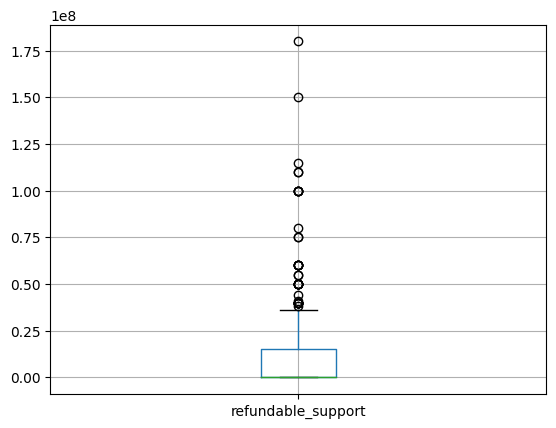

In [ ]:
df.boxplot('refundable_support')
# Есть выбросы, но их причина неизвестна и они в рамках разумного, оставляем без изменений,

Axes(0.125,0.11;0.775x0.77)


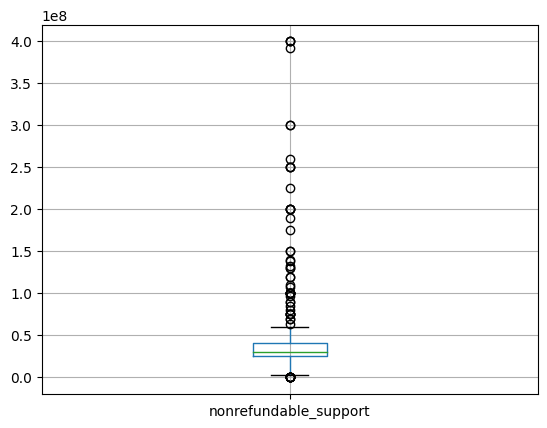

In [ ]:
print(df.boxplot('nonrefundable_support'))
# Есть выбросы, но их прирожда неизвестна, оставляем без изменений

<Axes: >

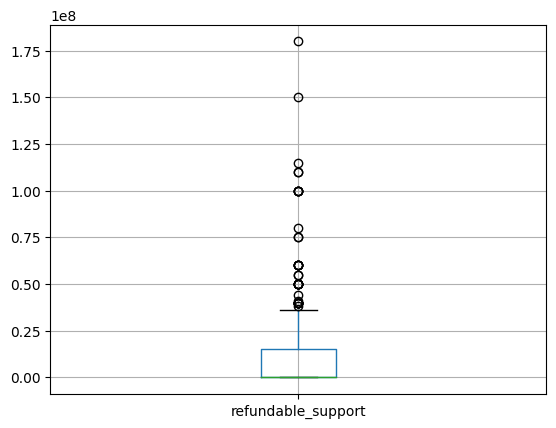

In [ ]:
df.boxplot('refundable_support')
# Есть выбросы, но их природа неизвестна, оставляем без изменений

<Axes: >

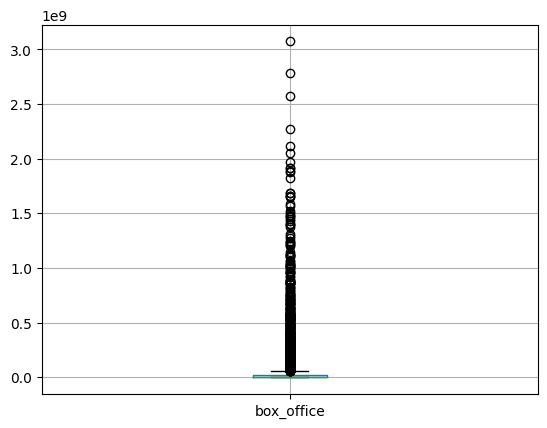

In [ ]:
df.boxplot('box_office')
# Есть выбросы, большей частью они происходят из-за отсутствия данных по сборам для большей части фильмов, в остальном распределение довольно ожидаемо

<Axes: >

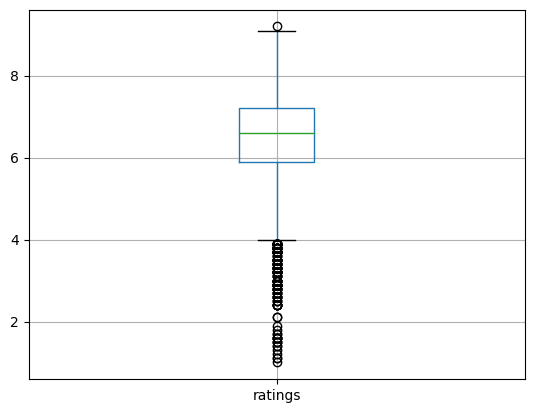

In [ ]:
df.boxplot('ratings')
# Распределение нормальное, да большей частью у фильмов средний и высокий рейтинг, однако есть фильмы с небывало низким рейтингом, это важные данные и удалять их не стоит


Выбросы присутствуют во всех данных, но их природа нам досконально не известна, поэтому мы не можем с точностью быть уверены в том, что выбросы допущены из-за ошибки в данных и удалить их не потеряв важные данные из других столбцов. Оставляем данные без изменений.

Отдельного интереса, заслуживает зависимость значений между столбцом budget и столбцами refundable_support и nonrefundable_support, по ним мы можем более подробно проверить правильность указания данных, ведь эти столбца должны быть взаимозависимыми, так как бюджет влкючает в себя в том числе и гос. поддержку. Чтобы найти эту зависимость мы воспользуемся инструментром построения точечной диаграммы и индексом корреляции.

0.6412236551080054

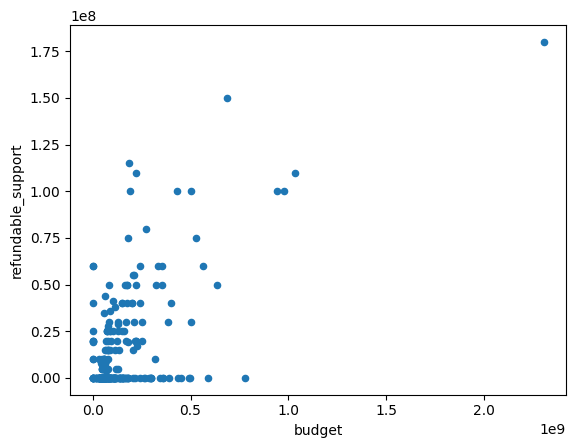

In [ ]:
df.plot(x='budget', y='refundable_support', kind='scatter')
df['budget'].corr(df['refundable_support'])

0.5941693326605132

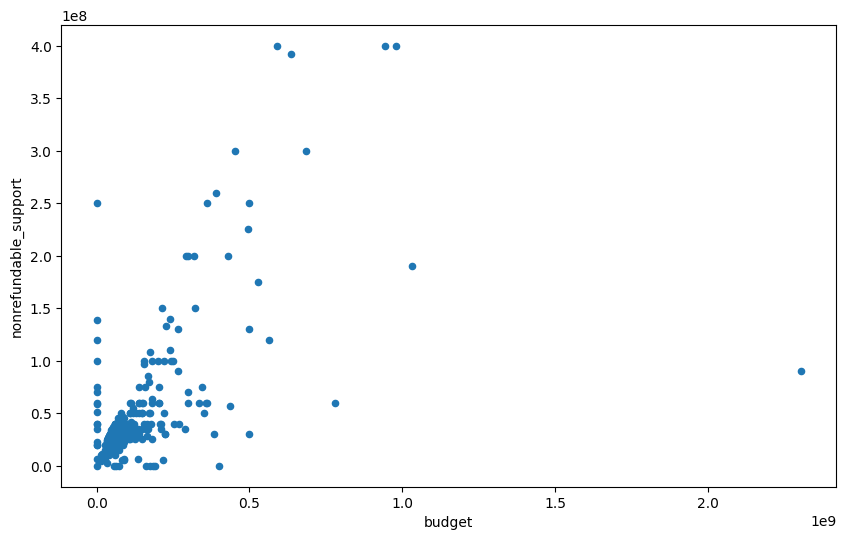

In [ ]:
df.plot(x='budget', y='nonrefundable_support', kind='scatter', figsize=(10, 6))
df['budget'].corr(df['nonrefundable_support'])

Насколько мы можем видеть зависимость, есть в обоих случаях, следовательно во первых указанный бюджет включает в себя гос поддержку, а также большая часть данных в этих столбцах указана верно, есть даже несколько фильмов с полной корреляцией, что значит, что может означать, что их снимали полностью на гос деньги. Также мы видим, что судя по пропускам данные по бюджету известны только для фильмов с гос поддержкой.

Проверим также, есть ли в таблице фильмы, где бюджет меньше суммы возвратной или невозвратной гос поддержки. Если такие строки есть, это будет означать явную ошибку в данных.

In [ ]:
df.query('nonrefundable_support > budget and budget != 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [ ]:
df.query('refundable_support > budget and budget != 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Такие примеры в наших данных отсутствуют

#### Шаг 2.6. Создание новых столбцов





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [ ]:
df['year'] = df['show_start_date'].dt.year

- Создадим столбец с основным жанром фильма и выделением основного режиссера картины. В столбцы войдут первые значения из списка жанров для каждого фильма ФИО первого в списке режиссера.

In [ ]:
def get_first_func(index):
    name = index.split(sep=",")
    return name[0]

df['main_genre'] = df['genres'].apply(get_first_func)
df['main_director'] = df['director'].apply(get_first_func)
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director
0,Открытый простор,"221,048,915",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик,драма,мелодрама",NaN,2015,боевик,Кевин Костнер
1,Особо важное задание,"111,013,716",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN,2016,драма,Е.Матвеев
2,Особо опасен,"221,038,416",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,"221,026,916",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,"221,030,815",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2015,фантастика,Тимур Бекмамбетов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,"126,008,019",2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Нет,NaN,2019,Нет,Фил Грабски
7482,Звериная ярость,"121,037,819",2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5,"боевик,триллер",NaN,2019,боевик,Ник Пауэлл
7483,Щенячий патруль: Скорей спешим на помощь!,"124,010,819",2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Нет,NaN,2019,Нет,Чарльз Е.Бастьен
7484,"Машины песенки. Серия ""Испанские мотивы""","124,010,619",2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Нет,NaN,2019,Нет,А.Беляев


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
df['gov_support_percent'] = (df['nonrefundable_support'] + df['refundable_support']) /df['budget']*100

#проверяем результат
#df.query('refundable_support == 0')
df.query('nonrefundable_support == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,gov_support_percent
2532,Бармен.,"111,009,615",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000",0,0,Фонд кино,6,"комедия,фэнтези","67,418,975",2015,комедия,Д.Штурманова,inf
2683,Дабл трабл,"111,009,215",2015-05-18 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Весёлая Компания""",Россия,Э.Оганесян,"Т.Бекмамбетов, М.Затуловская",«12+» - для детей старше 12 лет,"44,000,000",0,"64,030,080",Фонд кино,4,"комедия,мелодрама","19,654,526",2015,комедия,Э.Оганесян,69
2733,Неуловимые: последний герой,"111,017,415",2015-09-30 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз"", ООО ""Ультра стори""",Россия,А.Аксененко,"Г.Малков, В.Поляков, И.Капитонов, В.Муругов",«16+» - для детей старше 16 лет,"25,000,000",0,"73,379,554",Фонд кино,3,"мелодрама,криминал","11,034,433",2015,мелодрама,А.Аксененко,34
3042,Крякнутые каникулы,"114,003,615",2015-12-22 12:00:00+00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,"40,000,000",0,"399,075,326",Фонд кино,5,"мультфильм,комедия,приключения","69,693,748",2015,мультфильм,В.Лакисов,10
3224,Кухня. Последняя битва,"111,001,517",2017-03-22 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Аврора продакшнс"" по заказу ...",Россия,А.Федотов,"Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, А.Ку...",«12+» - для детей старше 12 лет,"50,000,000",0,"162,630,398",Фонд кино,6,комедия,"334,007,366",2017,комедия,А.Федотов,31
5659,Три богатыря и принцесса Египта,"114,003,317",2017-12-21 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"50,000,000",0,"174,464,395",Фонд кино,6,"мультфильм,приключения,семейный","759,226,773",2017,мультфильм,К.Феоктистов,29
6472,Три богатыря и наследница престола,"114,008,818",2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"115,000,000",0,"185,500,705",Фонд кино,6,"мультфильм,приключения,семейный","577,368,853",2018,мультфильм,К.Бронзит,62
6627,Рассвет,"111,000,419",2019-01-31 12:00:00+00:00,Художественный,"ООО ""Форс Медиа""",Россия,П.Сидоров,"В.Северцев, Д.Литвинов",«16+» - для детей старше 16 лет,"35,000,000",0,"56,693,559",Фонд кино,7,"ужасы,боевик","53,449,712",2019,ужасы,П.Сидоров,62
7466,Иван Царевич и Серый Волк 4,"114,005,019",2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000",0,"190,000,000",Фонд кино,7,"мультфильм,приключения,семейный","501,069,235",2019,мультфильм,Д.Шмидт,53


### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Также важно учитывать, что данные о прокате в кинотеатрах известны не для всех фильмов. Поэтому, дополнтельно посчитаю, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

1.3.1 Cчитаем сколько фильмов выходило в прокат ежегодно

2010    983
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: year, dtype: int64


<Axes: xlabel='year'>

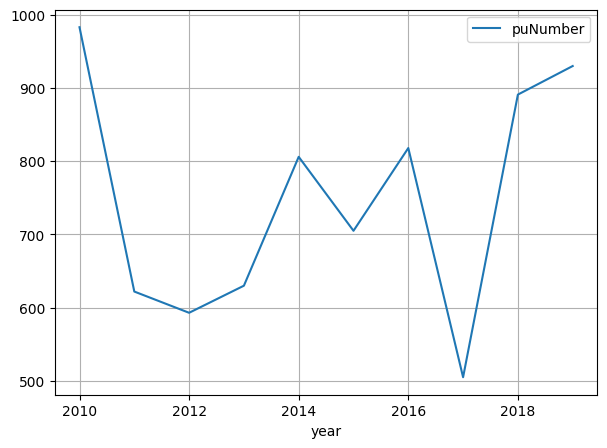

In [ ]:
print(df['year'].value_counts())
df.pivot_table(index='year',values='puNumber', aggfunc='count').plot(grid=True, figsize=(7, 5))

Больше всего фильмов было выпущено в 2019 году- 891, в целом распределение колличества фильмов по годам было не однородным, в 2011 году имел место сильный спад по колличеству выпущенных фильмов, затем к 2016 году удалось вернуться к значениям 2010 года, после чего последовал сильный спад был в 2017 году, после чего резкий рост и рекодное колличество выпущенных фильмов в 2019 году.

1.3.2 Посчитаем процент годов по которым в таблице доступна информация (указаны сборы), сперва выводим нужные данные с помощью сводной таблицы, а затем выводим нужный показатель в новом столбце

In [ ]:
df_pivot= df.pivot_table(index='year', values=['box_office','puNumber'], aggfunc='count')
df_pivot['%'] = df_pivot['box_office'] / df_pivot['puNumber']*100
df_pivot

,box_office,puNumber,%
year,,,
2010,105,983,11
2011,109,622,18
2012,128,593,22
2013,184,630,29
2014,279,806,35
2015,465,705,66
2016,526,818,64
2017,357,505,71
2018,475,891,53


Полнее всего по сборам в датафрейме представлена информация за 2017 год, само колличество информации по сборам в нашем датафрейме постепенно росло до 2017 года, после чего начало снижаться. В целом до 2015 года доля данных довольно низкая и данные по сборам представлены значительно хуже, скорее всего это связано с особенностями заполнения предоставленной базе данных. Это означает, что данные за 2015 год могут быть неполными и выводы касательно

1.3.3 Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [ ]:
df.pivot_table(index='year', values='box_office', aggfunc='sum')

,box_office
year,
2010,"2,428,654"
2011,"14,102,765"
2012,"6,955,423"
2013,"29,799,706"
2014,"7,444,951,859"
2015,"39,497,365,196"
2016,"47,866,299,742"
2017,"48,563,707,218"
2018,"49,668,403,134"


Минимальная сумма сборов за год была в 2017м году (подозреваю поскольку данные по сборам за этот год полнее всего представлены в датафрейме), а минимальная в 2011, в целом видно что постепенно сумма сборов повышается по сравнению с каждым предыдущии годом,

1.3.4 Посчитаем среднюю и медианную сумму сборов для каждого года

In [ ]:
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median','sum'])

,mean,median,sum
,box_office,box_office,box_office
year,,,
2010,"23,130","1,700","2,428,654"
2011,"129,383","3,000","14,102,765"
2012,"54,339","5,660","6,955,423"
2013,"161,955","3,522","29,799,706"
2014,"26,684,415","18,160","7,444,951,859"
2015,"84,940,570","4,920,933","39,497,365,196"
2016,"91,000,570","3,846,679","47,866,299,742"
2017,"136,032,793","9,968,340","48,563,707,218"


Медианные значения сильно отличаются от средних, что свидетельсвует о сильной неоднородности данных и присутствие в данных крупных выбросов. Также видно что постепенно с течением лет и ростом выручки (ориентировочно с 2014 года), по фильмам заметно растет и медианное значение по отношению к среднему значению, что может свидетельствовать о более ровном распределении сборов между фильмами и снижение колличества суперзвезд, делающих наибольшую выручку по сравнению с другими лентами этого года.

1.3.5  Определим влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

Чтобы определить как возрастной рейтинг фильма влияет на сборы, воспользуемся данными сводной таблицы и медианным значением, так как они более чувствительны к выбросам, нежели среднее значение, что мы можем видеть по анализу в предыдущем пункте.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Замечательно!
</div>

In [ ]:
#Сперва изучаем суммарные сборы для каждого возрастного рейтинга, чтобы узнать фильмы какой возрастной группы принесли наибольшую выручку
df.query('year >= 2015').pivot_table(index=['age_restriction'], values='box_office', aggfunc= 'median')

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"2,943,319"
«12+» - для детей старше 12 лет,"5,065,044"
«16+» - для детей старше 16 лет,"5,600,007"
«18+» - запрещено для детей,"6,154,439"
«6+» - для детей старше 6 лет,"13,736,208"


Теперь углубимся и построим график, чтобы узнать как год от года менялась картина по сборам в зависимости от возрастного рейтинга фильма

<Axes: xlabel='year'>

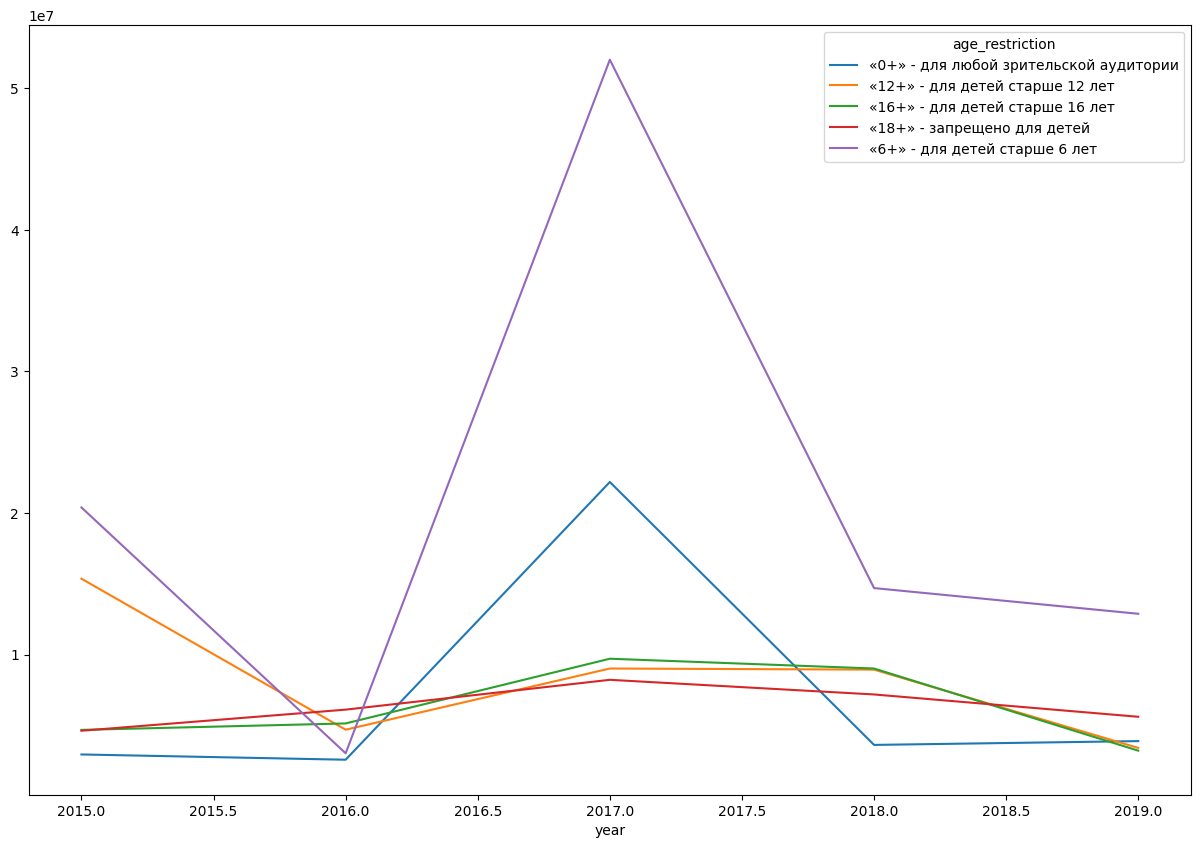

In [ ]:
df.query('year >=2015').pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc= 'median').plot(figsize=(15, 10))

Суммарно за эти 5 лет наибольшие сборы принесли картины с возврастным ограничением- 6+, и согласно серии графиков, эти картины дейтвительно приносят больше денег, чем другие возрастные рейтинги, особенно в 2017 году, когда это значение было пиковым. Однако так было не всегда и например в 2016 году, наибольшие сборы принесли картины с возврастным рейтингом 18+ , в то время как остальные фильмы испытывали спад. В то же время, если судить по суммарным сборам, наибольшие суммарные сборы принося картины с возрастным рейтингом 16+, беря больше колличеством выпускаемых лент, чем средним занчением окупаемости.

Возможно дело в колличесте представленных данных или в колличестве фильмов выходящийх для каждого рейтинга ежегодно, проверим эти данные в сводной таблице

In [ ]:
df.query('year >= 2015').pivot_table(index=['year','age_restriction'], values=['puNumber','box_office'], aggfunc= 'count')

box_office  puNumber
year age_restriction                                             
2015 «0+» - для любой зрительской аудитории          39        50
     «12+» - для детей старше 12 лет                 73       137
     «16+» - для детей старше 16 лет                168       249
     «18+» - запрещено для детей                    132       192
     «6+» - для детей старше 6 лет                   53        77
2016 «0+» - для любой зрительской аудитории          41        73
     «12+» - для детей старше 12 лет                 82       136
     «16+» - для детей старше 16 лет                182       269
     «18+» - запрещено для детей                    151       245
     «6+» - для детей старше 6 лет                   70        95
2017 «0+» - для любой зрительской аудитории           3        44
     «12+» - для детей старше 12 лет                 41        70
     «16+» - для детей старше 16 лет                121       153
     «18+» - запрещено для детей                    147       172
     «6+» - для детей старше 6 лет                   45        66
2018 «0+» - для любой зрительской аудитории           5        77
     «12+» - для детей старше 12 лет                 67       243
     «16+» - для детей старше 16 лет                156       235
     «18+» - запрещено для детей                    179       222
     «6+» - для детей старше 6 лет                   68       114
2019 «0+» - для любой зрительской аудитории           3        73
     «12+» - для детей старше 12 лет                 85       203
     «16+» - для детей старше 16 лет                178       266
     «18+» - запрещено для детей                    183       255
     «6+» - для детей старше 6 лет                   81       133

Насколько мы видим колличество выходяших фильмов мало корелелирует с итоговыми сборами. Так например несмотря на то, что колличество вышедшх в 2016 году фильмов, было значильно больше чем в 2017 году, сборы 2017го года составили намного больший объем. Таким образом, колличество выходящих фильмо мало влияет на итоговые сборы и с большей вероятностью большую кассу приносят именно определенные ленты, а не их колличство.
Связано это скорее с тем, что фильмы 6+ позиционируется больше как семейное кино и могут привлечь суммарно большее колличество зрителей, нежели фильмы других возрастных рейтингов

###### ДОП АНАЛИЗ

Также дополнительно проанализируем как жанр фильмов влияет на их сборы и рейтинг, увидим насколько рейтинг фильма влияет на сборы, а также постараемся вывести наиболее популярные жанры и типы фильмов в качетве индикатора используя суммарные сборы по этим фильмам (чем большую сумму получили фильмы какого-либо жанра с течением лет, тем этот жанр популярнее))

0.09108733255529522

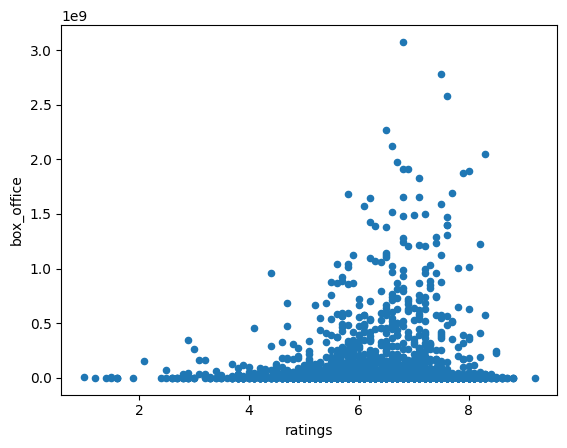

In [ ]:
# Анализируем зависисмость рейтинга от сборов
df.query('box_office != 0 and ratings != 0').plot(x='ratings', y='box_office', kind='scatter')
df['ratings'].corr(df['box_office'])

Насколько мы видим высокий рейтинг вовсе не означает коммерческий успех фильма, и даже фильмы с сравнительно средним рейтингом могут иметь высокий коммерческий успех

In [ ]:
# Выявляем самый коммерчески выгодный жанр фильмов
df.pivot_table(index= 'main_genre', values= 'box_office', aggfunc='sum').sort_values(by='box_office', ascending=False)

,box_office
main_genre,
фантастика,"50,986,431,810"
мультфильм,"36,959,939,316"
боевик,"27,598,666,334"
фэнтези,"26,508,737,383"
комедия,"24,476,443,355"
драма,"19,129,869,724"
ужасы,"16,624,149,925"
Нет,"8,977,870,561"
триллер,"7,697,875,038"


In [ ]:
# Выявляем самый коммерчески выгодный тип фильмов
df.pivot_table(index= 'type', values= 'box_office', aggfunc='sum').sort_values(by='box_office', ascending=False)

,box_office
type,
Художественный,"197,929,216,446"
Анимационный,"43,193,935,738"
Прочие,"303,229,676"
Документальный,"66,266,378"
Научно-популярный,"25,657,604"
Музыкально-развлекательный,"1,416,635"


In [ ]:
# Проверяем насколько эти данные актуальны для 2019 года
df.query('year == 2019').pivot_table(index= ['year','main_genre'], values= 'box_office', aggfunc='sum').sort_values(by='box_office', ascending=False)

box_office
year main_genre                   
2019 фантастика      9,108,688,750
     мультфильм      9,106,072,768
     комедия         7,367,659,548
     фэнтези         5,049,840,208
     драма           3,789,991,498
     ужасы           3,782,693,490
     боевик          3,422,790,630
     триллер         3,034,934,083
     история           878,809,030
     мелодрама         581,826,648
     детектив          469,102,868
     приключения       454,319,214
     военный           320,014,115
     биография         245,039,436
     мюзикл            242,001,399
     Нет               128,677,069
     семейный          120,312,829
     документальный    115,771,778
     аниме              85,916,154
     музыка             46,769,961
     криминал           39,930,912
     реальное ТВ        32,721,103
     вестерн             1,825,289
     детский                     0
     короткометражка             0

Таким образом, насколько мы видим наибольший коммерческий успех способен принести хуожественный фильм в жанре фантастики, с рейтингом 12+, эти данные верны и относительно к 2019 году, при этом выскоий рейтинг фильма вовсе не означает его коммерческий успех.

Однако, нам не стоит смотреть на суммарные сборы, потому что все эти категории могут сильно отличаться между собой по размеру. Сейчас мы не можем точно сказать с чем связаны большие сборы жанра "фантастика": с популярностью у зрителей или количеством выпущенных фильмов. Поэтому лучше будет дополнительно изучить и медианные сборы.

Картина дейтвительно значительно изменилась. Причем нашлись интересные закономерности с анализом возрастных категорий. Наиболее популярным типом фильмов оказались анимационные фильмы, что хорошо соответствует наиболее популярному возрастному рейтингу, который мы вывели. Таким образом наибольшим коммерческим успехом за все время, пользовались анимационный картины, жанра спорт, возрастного рейтинга 6+, но эта картина не однородна для всех лет и так например для 2019 года, более актуальными будут военные и художественные фильмы.

In [ ]:
# Выявляем самый коммерчески выгодный жанр фильмов
df.pivot_table(index= 'main_genre', values= 'box_office', aggfunc='median').sort_values(by='box_office', ascending=False)

,box_office
main_genre,
спорт,"86,086,226"
реальное ТВ,"32,721,103"
фантастика,"27,552,066"
детектив,"14,407,891"
боевик,"10,819,136"
ужасы,"9,876,765"
биография,"9,319,952"
мюзикл,"8,949,051"
военный,"7,400,330"


In [ ]:
# Выявляем самый коммерчески выгодный тип фильмов
df.pivot_table(index= 'type', values= 'box_office', aggfunc='median').sort_values(by='box_office', ascending=False)

,box_office
type,
Анимационный,"2,878,200"
Художественный,"2,758,808"
Музыкально-развлекательный,"1,416,635"
Научно-популярный,"802,765"
Прочие,"742,164"
Документальный,"360,596"


In [ ]:
# Проверяем насколько эти данные актуальны для 2019 года
display(df.query('year == 2019').pivot_table(index= ['year','main_genre'], values= 'box_office', aggfunc='median').sort_values(by='box_office', ascending=False))
display(df.query('year == 2018').pivot_table(index= ['year','main_genre'], values= 'box_office', aggfunc='median').sort_values(by='box_office', ascending=False))
display(df.query('year == 2017').pivot_table(index= ['year','main_genre'], values= 'box_office', aggfunc='median').sort_values(by='box_office', ascending=False))
display(df.query('year == 2019').pivot_table(index= ['type'], values= 'box_office', aggfunc='median').sort_values(by='box_office', ascending=False))

box_office
year main_genre                
2019 военный         62,400,531
     семейный        60,156,414
     музыка          46,769,961
     фантастика      35,881,661
     реальное ТВ     32,721,103
     детектив        29,286,456
     мультфильм      26,931,468
     мюзикл          15,807,298
     боевик          15,410,502
     фэнтези         13,848,462
     история         12,316,724
     ужасы            9,479,266
     биография        8,356,320
     триллер          7,322,873
     комедия          6,327,570
     мелодрама        5,901,733
     приключения      5,731,405
     аниме            4,201,492
     драма            3,565,967
     криминал         2,975,488
     вестерн          1,825,289
     документальный   1,307,884
     Нет                931,596

box_office
year main_genre                
2018 военный        129,854,348
     фантастика     124,478,239
     мультфильм      25,803,993
     боевик          21,164,351
     биография       20,836,073
     ужасы           18,790,342
     детектив        14,407,891
     приключения     12,093,742
     аниме           10,272,495
     комедия         10,097,674
     триллер          8,299,448
     фэнтези          6,080,756
     драма            4,805,349
     семейный         3,758,455
     мелодрама        3,300,846
     мюзикл           2,090,804
     документальный   1,872,596
     Нет                899,420

box_office
year main_genre                  
2017 спорт          2,779,686,144
     история          909,996,670
     мюзикл           732,287,208
     фэнтези          476,348,021
     фантастика       262,040,254
     военный          162,353,756
     мультфильм        73,483,710
     аниме             34,163,829
     детектив          29,448,086
     ужасы             24,234,502
     семейный          22,128,515
     боевик            16,621,642
     приключения       11,031,012
     триллер            6,666,154
     криминал           5,607,830
     комедия            5,480,410
     драма              5,345,387
     документальный     2,979,145
     Нет                2,322,497
     мелодрама          1,321,673

,box_office
type,
Художественный,"5,712,898"
Анимационный,"5,422,353"
Научно-популярный,"2,459,668"
Музыкально-развлекательный,"1,416,635"
Прочие,"899,078"
Документальный,"666,034"


### Шаг 4. Исследование фильмов, которые получили государственную поддержку

Одной из основных задач от заказчика в рамках исследование, было проанализировать фильмы с гос поддержкой и сделать по ним ряд выводов, исходя из данных датафрейма, особенно интересным кажется узнать как гос финансирование влияет на следующие столбцы:
- year- Сколько средств выделяют на фильмы ежегодно и как эта цифра меняется с годами
- type — каким типам фильмов чаще всего оказывается гос поддержка
- refundable_support — объём возвратных средств государственной поддержки, сколько средств вы
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — кто чаще всего и в каких объемах выделяет деньги на производство кино, зависит ли от источника финансирования, возвратные выделяются средства или нет
- budget — пригодидтся при анализе окупаемости
- ratings — Насколько фильмы с гос финансированием популярны у критиков и зрителей
- box_office - насколько окупаются фильмы, с гос финасированием и насколько они успешны в прокате
- director_surname - есть ли режиссеры, чаще других получающиее гос финансирование
- main_genre- какой жанр фильмов чаще всего получает гос финансирование
- gov_support_percent- как часто фильм снимается полностью на бюджетные деньги

1.4.0 Так как в данном анализе, зачастую нас интересуют фильмы исключительно с гос поддержкой, подготовим соответсвующие данные к анализу, создав новый датафрейм с соответствующими данными

In [ ]:
df_gov_support = df.query('gov_support_percent > 0').reset_index(drop=True)
df_gov_support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,gov_support_percent
0,Пока еще жива,"111,005,313",2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,"26,500,000","79,411,900",Министерство культуры,8,"драма,мелодрама","365,354",2013,драма,А.Атанесян,33
1,Бесславные придурки,"111,003,314",2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,"26,000,000","37,142,857",Министерство культуры,NaN,Нет,"28,140",2014,Нет,А.Якимчук,70
2,Невидимки,"111,004,213",2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,"107,847,945","176,023,490",Фонд кино,5,"комедия,фантастика","19,957,032",2013,комедия,Р.Давлетьяров,61
3,БЕРЦЫ,"111,004,314",2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,"28,000,000","40,574,140",Министерство культуры,4,драма,"55,918",2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),69
4,Братья Ч,"111,004,414",2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,"25,000,000","40,015,122",Министерство культуры,6,драма,"232,100",2014,драма,М.Угаров,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Союз спасения,"111,022,019",2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000","400,000,000","980,000,000",Фонд кино,6,"история,биография,драма","717,703,186",2019,история,А.Кравчук,51
328,Иван Царевич и Серый Волк 4,"114,005,019",2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000",0,"190,000,000",Фонд кино,7,"мультфильм,приключения,семейный","501,069,235",2019,мультфильм,Д.Шмидт,53
329,Вторжение,"111,022,519",2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000","400,000,000","944,000,000",Фонд кино,6,"фантастика,боевик",NaN,2019,фантастика,Ф.Бондарчук,53
330,Я свободен,"111,023,019",2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,"30,000,000","46,154,000",Министерство культуры,6,драма,NaN,2019,драма,И.Северов,65


1.4.1 Посмотрим как менялась динамика по гос финансированию фильмов ежегодно

In [ ]:
df_gov_support.value_counts('year')
#Насколько можно увидеть наибольший пик по колличеству картин с гос финансированием пришелся на 2015 год, после чего последовал спад в 2016 и постепенный рост с 2017 года

year
2015    86
2019    70
2016    61
2018    56
2017    41
2014    16
2013     2
dtype: int64

1.4.2 Посмотрим сколько средств суммарно выделялось на поддержку кино за все вермя и как эта цифра менялась с течением лет

In [ ]:
df_gov_support['sum_support'] = df_gov_support['refundable_support'] + df_gov_support['nonrefundable_support']
df_gov_support['sum_support'].sum()
df_gov_support.pivot_table(index= 'year', values='sum_support', aggfunc='sum')
# Суммарная поддержка за все года, представленные в датафрейме= 19 645 688 312
# Насколько можно видеть с течением лет поддержка повышалась, как и колличество фильмов с гос поддержкой

,sum_support
year,
2013,"134,347,945"
2014,"572,002,299"
2015,"3,656,241,459"
2016,"4,303,155,482"
2017,"3,183,971,662"
2018,"3,446,969,465"
2019,"4,904,000,000"


1.4.3 Посмотрим какой рейтинг чаще всего получают фильмы с гос поддержкой

array([[<Axes: title={'center': 'ratings'}>]], dtype=object)

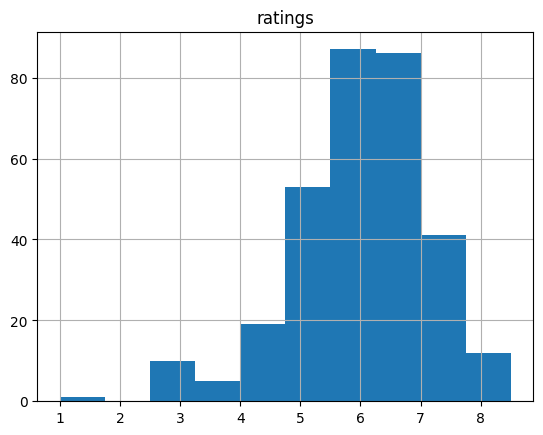

In [ ]:
df_gov_support.hist('ratings')

Насколько мы можем видеть большая часть фильмов получают оценки от 6 до 7 и очень редки картины получают больше 8, в основном фильмы тяготеют к более низким оценкам, что свидетельсвует о низком интересе к фильмам у зрителей

1.4.4 Посмотрим, насколько хорошо фильмы с гос поддержкой окупаются в прокате, показателем окупаемости будет разница между сборами и бюджетом фильма, если бюджет фильма больше суммы сборов, значит фильм не окупился, если меньше, значит окупился. Для получения этой информации создадим отдельный столбец и отдельнкю функцию

In [ ]:
def function(row):
    budget = row['budget']
    box_office = row['box_office']

    if budget == box_office:
        return 0.5 # фильм отбил вложенные средства
    if budget > box_office:
        return 0 # фильм полностью не окупился
    if budget < box_office:
        return 1 # фильм окупился

# Cоздаем отдельный столбец со значением окпаемости каждого фильма
df_gov_support['payback'] = df_gov_support.apply(function, axis=1)

In [ ]:
#Проверяем результаты анализа
df_gov_support.value_counts('payback')

payback
0    235
1     83
dtype: int64

Насколько мы можем видеть, большей частью фильмы с гос поддержкой не окупаются в прокате, соотношение фильмов с гос поддержкой окупившихся в прокате к неокупившимся составляет 35%, при этом полностью отсуствуют фильмы сборы которых равны бюджету, что было бы крайне маловероятно и подтверждает достоверность данных.

1.4.5 каким типам и жанрам фильмов чаще всего оказывается гос поддержка

In [ ]:
display(df_gov_support.value_counts('type'))
display(df_gov_support.value_counts('age_restriction'))
df_gov_support.value_counts('main_genre')
# Чаще всего гос поддержку получают Художественные картины в жанре Драмы, с возвратнсы рейтингом

type
Художественный    300
Анимационный       31
Документальный      1
dtype: int64

age_restriction
«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              65
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
dtype: int64

main_genre
драма          93
комедия        74
мультфильм     31
Нет            16
триллер        15
мелодрама      15
фантастика     11
фэнтези        11
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
детский         4
история         4
мюзикл          4
криминал        3
биография       3
спорт           3
реальное ТВ     1
dtype: int64

1.4.6 Какие студии и режисеры чаще всего оказывается гос поддержка и есть ли вообще хоть какая-то зависимость между этими значениями

In [ ]:
print(df_gov_support.value_counts('film_studio'))
df_gov_support.value_counts('main_director')

film_studio
ООО "Студия анимационного кино "Мельница"                  7
ООО "ТаББаК"                                               7
ООО "Кинокомпания "СТВ"                                    6
ООО "ВИЗАРТ ФИЛЬМ"                                         5
ООО "Продюсерский центр "Ленфильм"                         4
                                                          ..
ООО "Кинокомпания Блесс-Фильм", ООО "ARCHANGEL STUDIOS"    1
ООО "Кинокомпания Большое кино"                            1
ООО "Кинокомпания Дебют"                                   1
ООО "Кинокомпания КИТ"                                     1
Фонд поддержки развития общества "Наши дети"               1
Length: 258, dtype: int64


main_director
Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
С.Мокрицкий      3
А.Цицилин        3
                ..
Д.Штурманова     1
Е.Баранов        1
Е.Бедарев        1
Е.Борисова       1
Я.Поляруш        1
Length: 271, dtype: int64

Чаще всего гос поддержку получают фильмы студий "ТаББаК" и "Студия анимационного кино "Мельница", из режисссеров выделяются:Дьяченко, Андреасян и Давлетьяров, сильного перекоса в представленность фильмов какого-то одного режисера или студии не наблюдается

1.4.7 Какой тип финансирования (возвратный или невозйратный) наиболее часто используется для поддержки Российского кино, а также зависит ли тип финансирования от его источника.

In [ ]:
df_gov_support.pivot_table(index= 'financing_source', values=['nonrefundable_support', 'refundable_support'], aggfunc='sum')

,nonrefundable_support,refundable_support
financing_source,,
Министерство культуры,"4,836,661,000",0
"Министерство культуры, Фонд кино","859,931,354","325,500,000"
Фонд кино,"10,565,095,958","3,613,500,000"


Гос поддержка, от Министерства Культуры всегда подразумевает невозватные инвестиции, в том время как Фонд кино, чередует эти типы инвестиций, но в большей части прибегая к невозвратным инвестициям. Таким образом большая часть инвестиций в Российское кино носит невозвратный характер, что возможно и приводит к низкому качеству итогового продукта.

### Шаг 5. Общий вывод

#### Тренды кинематографа

**Динамика колличества вышедших фильмов**


Больше всего фильмов было выпущено в 2019 году- 891, в целом распределение количества фильмов по годам было не однородным, в 2011 году имел место сильный спад по количеству выпущенных фильмов, затем к 2016 году удалось вернуться к значениям 2010 года, после чего последовал резкий спад в 2017 году, после чего резкий рост и рекордное количество выпущенных фильмов в 2019 году. Возможно влияние на это оказывают определённые производственные циклы, принятые при производстве новых фильмов.

**Представленность данных по сборам**

Полнее всего информация по сборам в датафрейме представлена за 2017 год, само количество информации по сборам в датафрейме постепенно росло до 2017 года, после чего начало снижаться

**Динамика по выручке вышедших фильмов **

Минимальная сумма сборов за год была у фильмов в 2017м году, скорее всего это произошло из-за того, что данные по сборам за этот год полнее всего представлены в датафрейме), а минимальная сумма указана в 2011, в целом видно, что постепенно сумма сборов повышается по сравнению с каждым предыдущим годом. А также, что сумма сборов напрямую связана с представленностью данных по каждому из периодов.

**Медиана и среднее значение выручки**

Медианные значения сильно отличаются от средних, что свидетельсвует о сильной неоднородности данных и присутствие в данных крупных выбросов. Также видно что постепенно с течением лет и ростом выручки (ориентировочно с 2014 года), по фильмам заметно растет и медианное значение по отношению к среднему значению, что может свидетельствовать о более ровном распределении сборов между фильмами и снижение колличества суперзвезд, делающих наибольшую выручку по сравнению с другими лентами этого года.

**Влияние возрастных ограничений**

Суммарно за эти 5 лет наибольшие сборы принесли картины с возврастным ограничением- 6+, и согласно серии графиков, эти картины дейтвительно приносят больше денег, чем другие возрастные рейтинги, особенно в 2017 году, когда это значение было пиковым. Однако так было не всегда и например в 2016 году, наибольшие сборы принесли картины с возврастным рейтингом 18+ , в то время как остальные фильмы испытывали спад. В то же время, если судить по суммарным сборам, наибольшие суммарные сборы принося картины с возрастным рейтингом 16+, беря больше колличеством выпускаемых лент, чем средним занчением окупаемости.

В то же время, колличество выходяших фильмов мало корелелирует с итоговыми сборами. Так например несмотря на то, что колличество вышедшх в 2016 году фильмов категории 6+, было значильно больше чем в 2017 году, сборы 2017го года составили намного больший объем. Таким образом, колличество выходящих фильмо мало влияет на итоговые сборы и с большей вероятностью большую кассу приносят именно определенные ленты, а не их колличство.
Связано это скорее с тем, что фильмы 6+ позиционируется больше как семейное кино и могут привлечь суммарно большее колличество зрителей, нежели фильмы других возрастных рейтингов.

**Общий вывод + данные полученные в доп анализе**

Наиболее популярным типом фильмов оказались анимационные фильмы, что хорошо соответствует наиболее популярному возрастному рейтингу, который мы вывели. Таким образом наибольшим коммерческим успехом за все время, пользовались анимационный картины, жанра спорт, возрастного рейтинга 6+, но эта картина не однородна для всех лет и так например для 2019 года, более актуальными будут военные художественные фильмы.

**Фильмы с гос- поддержкой**

**Кол-во фильмов с гос финансированием**

Насколько можно увидеть наибольший пик по количеству картин с гос финансированием пришелся на 2015 год (86 картин), после чего последовал спад в 2016 и постепенный рост с 2017 до 2019 года (67), однако значений 2015 года так и не были достигнуты.

**Суммы гос финансирования с течением лет.**

Суммарная поддержка за все года, представленные в датафрейме= 19 645 688 312
Насколько можно видеть с течением лет гос поддержка фильмов повышалась, достигнув своего пика в 2019 году, не смотря на снижение количества картин с гос поддержкой. Из чего следует вывод, что хотя гос поддержка и стала выделяться меньшему количеству фильмов, общая сумма гос поддержки увеличилась.

**Интерес зрителей**

Большая часть фильмов с гос поддержкой получают оценки от 6 до 7 и очень редки картины получают больше 8, в основном фильмы тяготеют к более низким оценкам, что свидетельствует о низком интересе к фильмам у зрителей.

**Окупаемость**


Насколько мы можем видеть, большей частью фильмы с гос поддержкой не окупаются в прокате, соотношение фильмов с гос поддержкой окупившихся в прокате к неокупившимся составляет 35%, при этом полностью отсуствуют фильмы сборы которых равны бюджету, что было бы крайне маловероятно и подтверждает достоверность данных.

**Тип, жанр и возрастной рейтинг**

Чаще всего гос поддержку получают Художественные картины в жанре Драмы, с возвратным рейтингом 16+.

**Режиссер и студия**

Чаще всего гос поддержку получают фильмы студий "ТаББаК" и "Студия анимационного кино "Мельница", из режисссеров выделяются:Дьяченко, Андреасян и Давлетьяров, сильного перекоса в представленность фильмов какого-то одного режисера или студии не наблюдается и это хорошо.

**Тип и источник финансирования**

Гос поддержка, от Министерства Культуры всегда подразумевает невозватные инвестиции, в том время как Фонд кино, чередует эти типы инвестиций, но в большей части прибегая к невозвратным инвестициям. Таким образом большая часть инвестиций в Российское кино носит невозвратный характер, что возможно и приводит к низкому качеству итогового продукта.

**Итоговый вывод**

Чаще всего, фильмы с госсударственным финансированием не окупаются в прокате и получают довольно средние рейтинги, чем скорее всего и обусловлены их низкие сборы. Также, одно из причин низких сборов фильмов в прокате, могут быть то, что большая часть средств гос финансирования носит невозвратный характер, из-за чего у студий, может отсутвовать заинтересованность в коммерческом успехе ленты. Также насколько мы видим по данным из предыдущего анализа, повысить сборы может помочь, также и концентрация на более комерчески успешном жанре военных художественных лент и фильмах с возратсным рейтингом- +.